<a href="https://colab.research.google.com/github/nnaemekaukpa/Leveraging-Deep-Learning-Architecture-for-Accurate-and-Efficient-Bone-Cancer-Detection-/blob/main/AlexNet_%2B_without_canny_3rd_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Importing the necessary libraries
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import image as mpimg
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dataset = '/content/drive/MyDrive/bone cancer detection.v2i.folder/train'
valid_dataset = '/content/drive/MyDrive/bone cancer detection.v2i.folder/valid'
test_dataset = '/content/drive/MyDrive/bone cancer detection.v2i.folder/test'

In [ ]:
import os
import shutil
import random

train_dir = os.path.join(train_dataset, "")
val_dir = os.path.join(valid_dataset, "")
test_dir = os.path.join(test_dataset, "")
categories = ["normal", "cancer"]
target_val_size = 2643
target_test_size = 2643

## Validation dataset splitting
current_total_val = sum(len(os.listdir(os.path.join(val_dir, cat))) for cat in categories)
images_needed_val = max(0, target_val_size - current_total_val)

if images_needed_val == 0:
    print("Validation dataset is now splitted")
else:
    moved_count_val = 0
    for category in categories:
        train_path = os.path.join(train_dir, category)
        val_path = os.path.join(val_dir, category)
        train_images = os.listdir(train_path)
        images_to_move_val = min(images_needed_val // 2, len(train_images))

        for image in random.sample(train_images, images_to_move_val):
            shutil.move(os.path.join(train_path, image), os.path.join(val_path, image))
            moved_count_val += 1
            print(f"Moved {images_to_move_val} images to '{val_path}'")
print("Validation image movement is now complete")

## Testing dataset splitting
current_total_test = sum(len(os.listdir(os.path.join(test_dir, cat))) for cat in categories)
images_needed_test = max(0, target_test_size - current_total_test)

if images_needed_test == 0:
    print("Testing dataset is now splitted")
else:
    moved_count_test = 0
    for category in categories:
        train_path = os.path.join(train_dir, category)
        test_path = os.path.join(test_dir, category)
        train_images = os.listdir(train_path)
        images_to_move_test = min(images_needed_test // 2, len(train_images))

        for image in random.sample(train_images, images_to_move_test):
            shutil.move(os.path.join(train_path, image), os.path.join(test_path, image))
            moved_count_test += 1
            print(f"Moved {images_to_move_test} images to '{test_path}'")
print("Testing image movement is now complete")

Validation dataset is now splitted
Validation image movement is now complete
Testing dataset is now splitted
Testing image movement is now complete


In [ ]:
## function to list files and folder in the directory
def list_contents(directory):
  if os.path.exists(directory):
    print(f'contents of {directory}:')
    print(os.listdir(directory))
  else:
    print(f'{directory} does not exist')



In [ ]:
list_contents(train_dataset)
list_contents(valid_dataset)
list_contents(test_dataset)

contents of /content/drive/MyDrive/bone cancer detection.v2i.folder/train:
['normal', 'cancer']
contents of /content/drive/MyDrive/bone cancer detection.v2i.folder/valid:
['cancer', 'normal']
contents of /content/drive/MyDrive/bone cancer detection.v2i.folder/test:
['normal', 'cancer']


In [ ]:
def count_files(directory):
  if os.path.exists(directory):
    classes=[i for i in os.listdir(directory) if os.path.isdir(os.path.join(directory, i))]
    total_files=sum([len(files) for _,_,files in os.walk(directory)])
    print(f'found {total_files} images belonging to {len(classes)} classes.')
  else:
    print(f'{directory} does not exist')

In [ ]:
count_files(train_dataset)
count_files(valid_dataset)
count_files(test_dataset)

found 17617 images belonging to 2 classes.
found 2643 images belonging to 2 classes.
found 2643 images belonging to 2 classes.


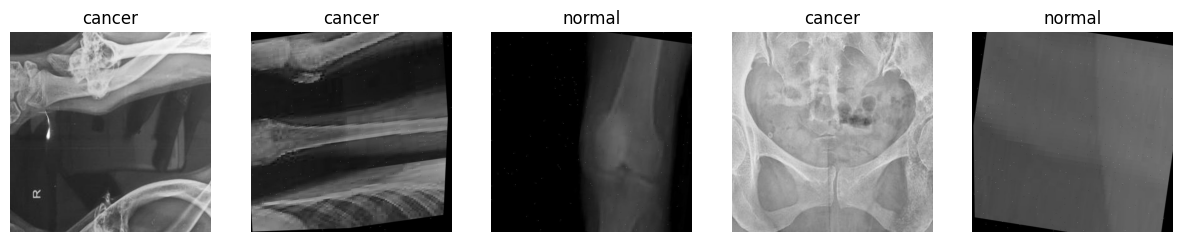

In [ ]:


# Get classes (subfolders) in Train dataset
classes = [i for i in os.listdir(train_dataset) if os.path.isdir(os.path.join(train_dataset, i))]

# Select 5 random images from random classes
images = []
labels = []
for _ in range(5):
    class_name = random.choice(classes)
    class_path = os.path.join(train_dataset, class_name)
    image_file = random.choice(os.listdir(class_path))
    images.append(os.path.join(class_path, image_file))
    labels.append(class_name)

# Display images
plt.figure(figsize=(15, 20))
for i, img_path in enumerate(images):
    img = mpimg.imread(img_path)
    plt.subplot(1,5, i + 1)
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis("off")
plt.show()


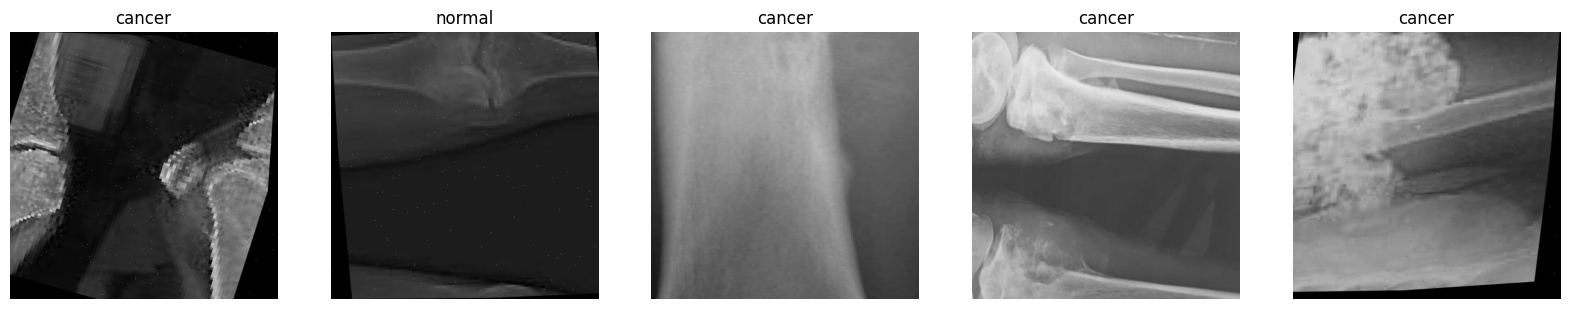

In [ ]:


# Get classes (subfolders) in test dataset
classes = [d for d in os.listdir(test_dataset) if os.path.isdir(os.path.join(test_dataset, d))]

# Select 5 random images from random classes
images = []
labels = []
for _ in range(5):
    class_name = random.choice(classes)
    class_path = os.path.join(test_dataset, class_name)
    image_file = random.choice(os.listdir(class_path))
    images.append(os.path.join(class_path, image_file))
    labels.append(class_name)

# Display images
plt.figure(figsize=(20, 20))
for i, img_path in enumerate(images):
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis("off")

plt.show()


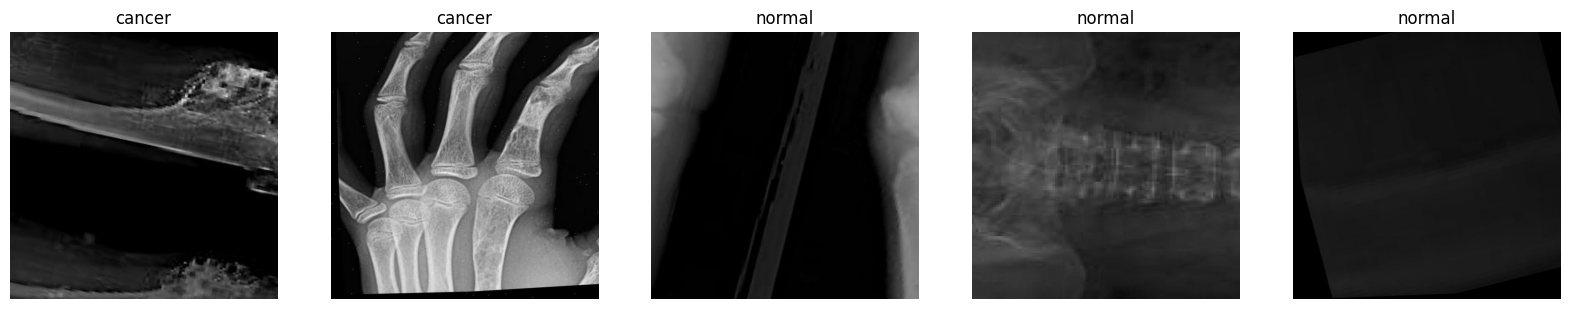

In [ ]:


# Get classes (subfolders) in valid dataset
classes = [d for d in os.listdir(valid_dataset) if os.path.isdir(os.path.join(valid_dataset, d))]

# Select 5 random images from random classes
images = []
labels = []
for _ in range(5):
    class_name = random.choice(classes)
    class_path = os.path.join(valid_dataset, class_name)
    image_file = random.choice(os.listdir(class_path))
    images.append(os.path.join(class_path, image_file))
    labels.append(class_name)

# Display images
plt.figure(figsize=(20, 20))
for i, img_path in enumerate(images):
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(labels[i])
    plt.axis("off")

plt.show()


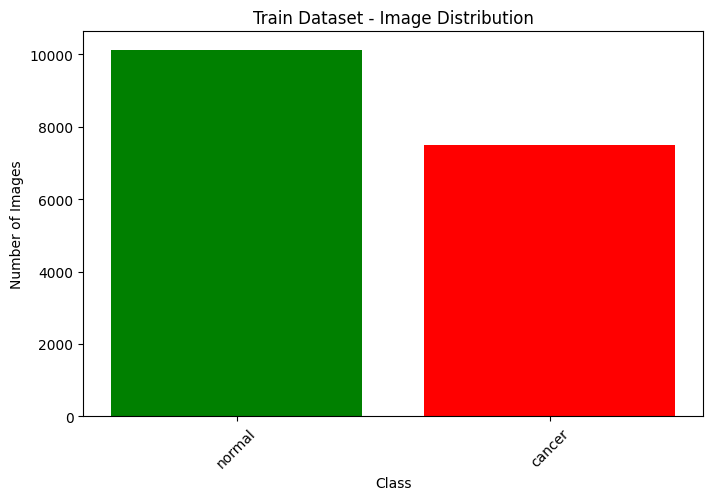

In [ ]:
# Count images in each class (train)
class_counts = {}
for class_name in os.listdir(train_dataset):
    class_path = os.path.join(train_dataset, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color=['green', 'red','blue'])
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Train Dataset - Image Distribution")
plt.xticks(rotation=45)
plt.show()



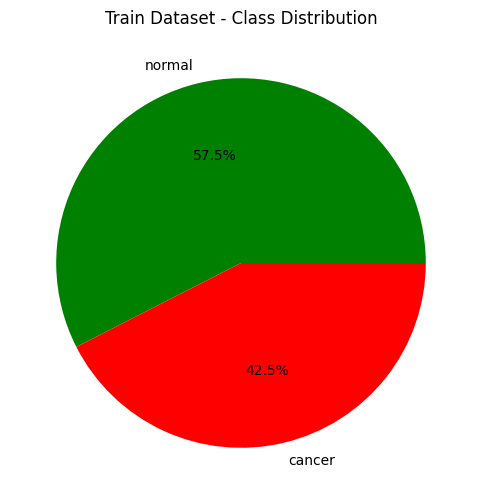

In [ ]:
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title("Train Dataset - Class Distribution")
plt.show()

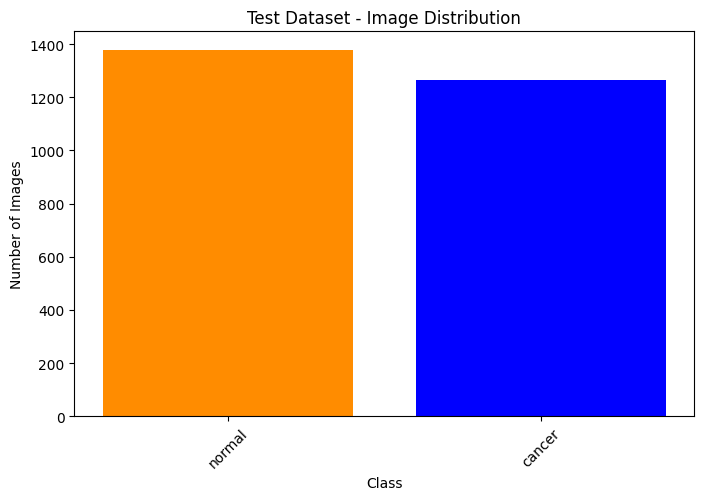

In [ ]:
# Count images in each class (test)
class_counts = {}
for class_name in os.listdir(test_dataset):
    class_path = os.path.join(test_dataset, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plot bar chart
plt.figure(figsize=(8, 5))
class_counts.values()
plt.bar(class_counts.keys(), class_counts.values(), color=['darkorange','blue'])
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Test Dataset - Image Distribution")
plt.xticks(rotation=45)
plt.show()



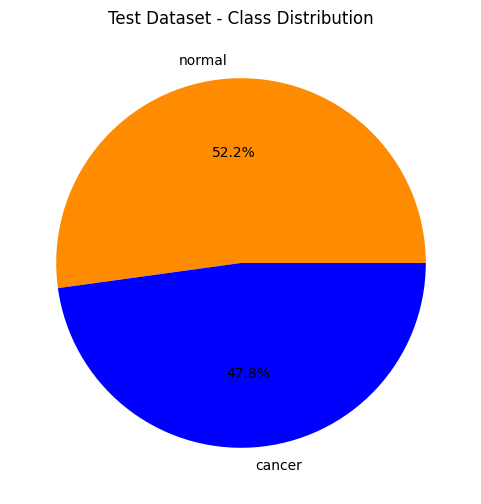

In [ ]:
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', colors=['darkorange', 'blue'])
plt.title("Test Dataset - Class Distribution")
plt.show()

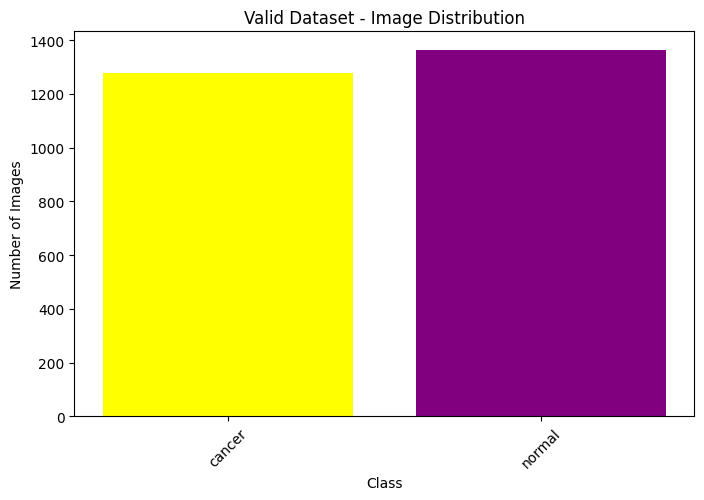

In [ ]:
# Count images in each class (validation)
class_counts = {}
for class_name in os.listdir(valid_dataset):
    class_path = os.path.join(valid_dataset, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values(), color=[ 'yellow', 'purple'])
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Valid Dataset - Image Distribution")
plt.xticks(rotation=45)
plt.show()



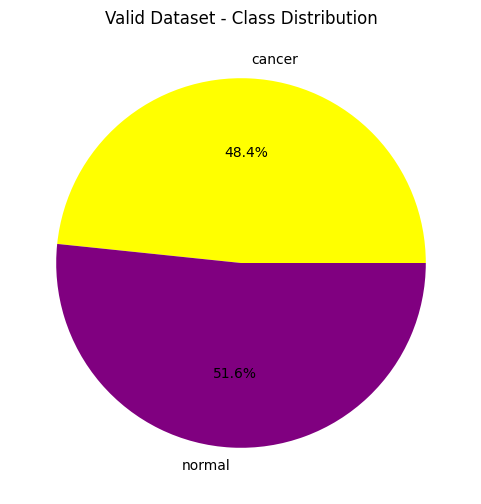

In [ ]:
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', colors=['yellow', 'purple'])
plt.title("Valid Dataset - Class Distribution")
plt.show()

In [ ]:
import pandas as pd

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
)

In [ ]:
def create_dataframe(dataset_path):
    data = []
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                data.append([os.path.join(class_name, image_file), class_name])  # [image, label]
    return pd.DataFrame(data, columns=['image', 'label'])

train_df = create_dataframe(train_dataset)
test_df = create_dataframe(test_dataset)
valid_df = create_dataframe(valid_dataset)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image and batch sizes
image_size = (224, 224)
batch_size = 32

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)


# No augmentation for validation and test data
test_val_datagen = ImageDataGenerator(rescale=1./255)

#  Training generator
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    directory=train_dataset
)

#  Validation generator
valid_generator = test_val_datagen.flow_from_dataframe(
    valid_df,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
    directory=valid_dataset
)

#  Test generator
test_generator = test_val_datagen.flow_from_dataframe(
    test_df,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
    directory=test_dataset
)


Found 17617 validated image filenames belonging to 2 classes.
Found 2643 validated image filenames belonging to 2 classes.
Found 2643 validated image filenames belonging to 2 classes.


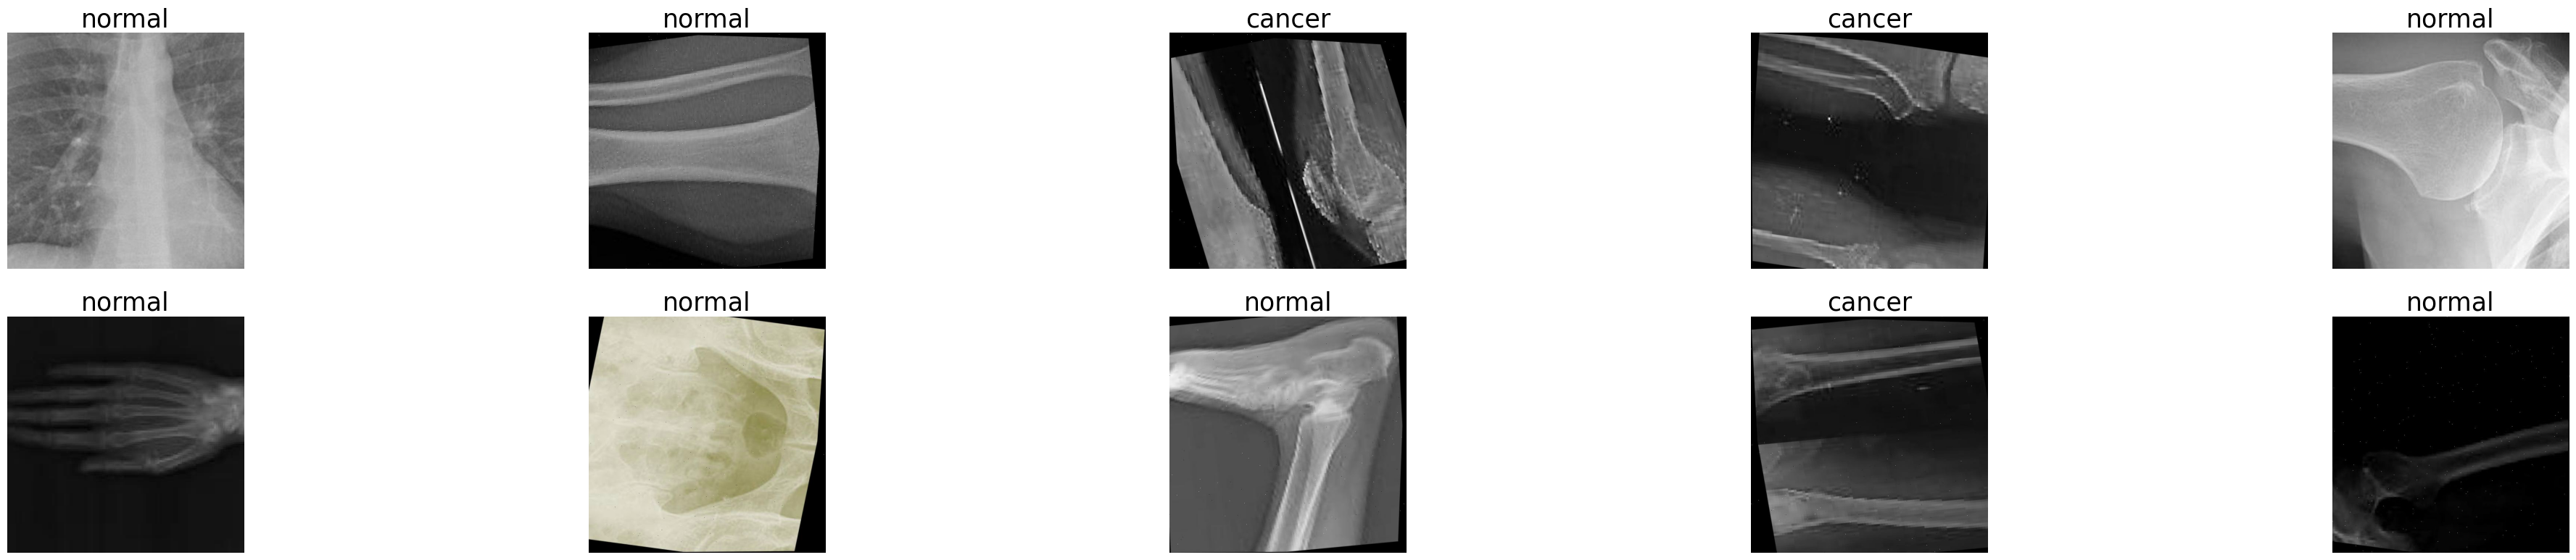

In [ ]:
plt.figure(figsize=(50,50))
for n,i in enumerate(np.random.randint(0,len(train_df),10)):
    plt.subplot(10,5,n+1)
    img=cv2.imread(train_dataset + '/' + train_df.image[i])
    plt.imshow(img)
    plt.axis('off')
    plt.title(train_df.label[i],fontsize=25)

In [ ]:
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import tensorflow as tf

# Binary classification output
class_num = 1

model = models.Sequential()

# Layer 1
model.add(layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu',
                        input_shape=(224, 224, 3),
                        kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))

# Layer 2
model.add(layers.Conv2D(256, (5, 5), padding='same', activation='relu',
                        kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))

# Layer 3
model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu',
                        kernel_regularizer=regularizers.l2(0.001)))

# Layer 4
model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu',
                        kernel_regularizer=regularizers.l2(0.001)))

# Layer 5
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu',
                        kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))

# Fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))

# Output layer
model.add(layers.Dense(class_num, activation='sigmoid'))

# Compile
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc'),
                       tf.keras.metrics.SpecificityAtSensitivity(0.5)])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 54, 54, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 54, 54, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 26, 26, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 26, 26, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       6,554,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,353,857 (43.31 MB)

 Trainable params: 11,353,153 (43.31 MB)

 Non-trainable params: 704 (2.75 KB)

In [ ]:
from tensorflow.keras.optimizers import Adam # Importing the Adam optimizer
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import metrics
import  tensorflow.keras as keras


In [ ]:
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

callbacks = [early_stop, checkpoint, lr_scheduler]


In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator,
    callbacks=callbacks
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7165 - auc: 0.7861 - loss: 3.0692 - specificity_at_sensitivity: 0.8865

551/551 ━━━━━━━━━━━━━━━━━━━━ 4130s 7s/step - accuracy: 0.7165 - auc: 0.7862 - loss: 3.0677 - specificity_at_sensitivity: 0.8866 - val_accuracy: 0.6073 - val_auc: 0.7968 - val_loss: 1.7549 - val_specificity_at_sensitivity: 0.7950 - learning_rate: 5.0000e-04
Epoch 2/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 0s 502ms/step - accuracy: 0.7764 - auc: 0.8682 - loss: 1.0458 - specificity_at_sensitivity: 0.9607

551/551 ━━━━━━━━━━━━━━━━━━━━ 291s 526ms/step - accuracy: 0.7764 - auc: 0.8682 - loss: 1.0456 - specificity_at_sensitivity: 0.9607 - val_accuracy: 0.6277 - val_auc: 0.8756 - val_loss: 1.2936 - val_specificity_at_sensitivity: 0.9484 - learning_rate: 5.0000e-04
Epoch 3/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - accuracy: 0.7894 - auc: 0.8794 - loss: 0.6607 - specificity_at_sensitivity: 0.9535

551/551 ━━━━━━━━━━━━━━━━━━━━ 294s 532ms/step - accuracy: 0.7894 - auc: 0.8794 - loss: 0.6606 - specificity_at_sensitivity: 0.9535 - val_accuracy: 0.7552 - val_auc: 0.9122 - val_loss: 0.6210 - val_specificity_at_sensitivity: 0.9718 - learning_rate: 5.0000e-04
Epoch 4/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 0s 502ms/step - accuracy: 0.8098 - auc: 0.8974 - loss: 0.5164 - specificity_at_sensitivity: 0.9671

551/551 ━━━━━━━━━━━━━━━━━━━━ 289s 525ms/step - accuracy: 0.8098 - auc: 0.8974 - loss: 0.5164 - specificity_at_sensitivity: 0.9671 - val_accuracy: 0.8210 - val_auc: 0.9167 - val_loss: 0.4604 - val_specificity_at_sensitivity: 0.9844 - learning_rate: 5.0000e-04
Epoch 5/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.8040 - auc: 0.8920 - loss: 0.4848 - specificity_at_sensitivity: 0.9669

551/551 ━━━━━━━━━━━━━━━━━━━━ 290s 527ms/step - accuracy: 0.8040 - auc: 0.8920 - loss: 0.4848 - specificity_at_sensitivity: 0.9669 - val_accuracy: 0.8324 - val_auc: 0.9293 - val_loss: 0.4131 - val_specificity_at_sensitivity: 0.9867 - learning_rate: 5.0000e-04
Epoch 6/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 290s 526ms/step - accuracy: 0.8077 - auc: 0.8981 - loss: 0.4584 - specificity_at_sensitivity: 0.9669 - val_accuracy: 0.8282 - val_auc: 0.9188 - val_loss: 0.4578 - val_specificity_at_sensitivity: 0.9890 - learning_rate: 5.0000e-04
Epoch 7/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 295s 535ms/step - accuracy: 0.8079 - auc: 0.8997 - loss: 0.4484 - specificity_at_sensitivity: 0.9725 - val_accuracy: 0.7893 - val_auc: 0.9180 - val_loss: 0.4718 - val_specificity_at_sensitivity: 0.9750 - learning_rate: 5.0000e-04
Epoch 8/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - accuracy: 0.8083 - auc: 0.8977 - loss: 0.4468 - specificity_at_sensitivity: 0.9710

551/551 ━━━━━━━━━━━━━━━━━━━━ 291s 529ms/step - accuracy: 0.8083 - auc: 0.8977 - loss: 0.4468 - specificity_at_sensitivity: 0.9709 - val_accuracy: 0.8369 - val_auc: 0.9307 - val_loss: 0.3973 - val_specificity_at_sensitivity: 0.9851 - learning_rate: 5.0000e-04
Epoch 9/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 291s 527ms/step - accuracy: 0.8094 - auc: 0.8954 - loss: 0.4520 - specificity_at_sensitivity: 0.9687 - val_accuracy: 0.7900 - val_auc: 0.8899 - val_loss: 0.4972 - val_specificity_at_sensitivity: 0.9797 - learning_rate: 5.0000e-04
Epoch 10/10
551/551 ━━━━━━━━━━━━━━━━━━━━ 288s 523ms/step - accuracy: 0.8133 - auc: 0.9014 - loss: 0.4398 - specificity_at_sensitivity: 0.9687 - val_accuracy: 0.8335 - val_auc: 0.9247 - val_loss: 0.4256 - val_specificity_at_sensitivity: 0.9804 - learning_rate: 5.0000e-04


In [ ]:
hist_=pd.DataFrame(history.history)
hist_

,accuracy,auc,loss,specificity_at_sensitivity,val_accuracy,val_auc,val_loss,val_specificity_at_sensitivity,learning_rate
0,0.749106,0.833472,2.220400,0.931615,0.607264,0.796817,1.754899,0.794992,0.0005
1,0.785094,0.876945,0.902774,0.963003,0.627696,0.875640,1.293591,0.948357,0.0005
2,0.791224,0.880515,0.622829,0.956859,0.755202,0.912177,0.621001,0.971831,0.0005
3,0.804053,0.893271,0.511990,0.967811,0.821037,0.916678,0.460367,0.984351,0.0005
4,0.806437,0.895119,0.476507,0.967944,0.832387,0.929266,0.413132,0.986698,0.0005
5,0.809672,0.898865,0.455548,0.967143,0.828225,0.918825,0.457836,0.989045,0.0005
6,0.811489,0.901038,0.445192,0.970482,0.789255,0.918037,0.471828,0.974961,0.0005
7,0.811773,0.900173,0.442824,0.969280,0.836928,0.930666,0.397268,0.985133,0.0005
8,0.808991,0.898556,0.445571,0.969013,0.790011,0.889889,0.497163,0.979656,0.0005
9,0.811716,0.902277,0.436144,0.971150,0.833522,0.924717,0.425597,0.980438,0.0005


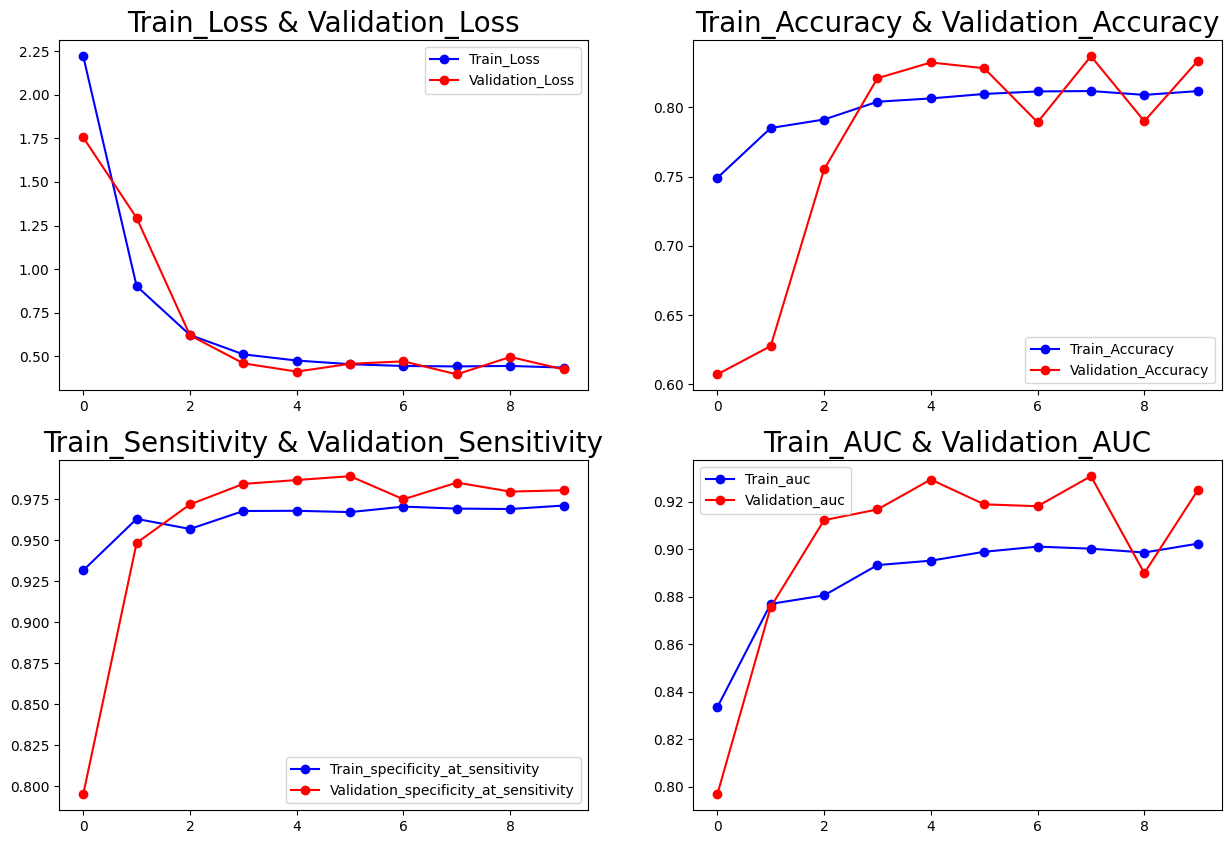

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(hist_['loss'],'b-o',label='Train_Loss')
plt.plot(hist_['val_loss'],'r-o',label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(2,2,2)
plt.plot(hist_['accuracy'],'b-o',label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],'r-o',label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()
plt.subplot(2,2,3)
plt.plot(hist_['specificity_at_sensitivity'],'b-o',label='Train_specificity_at_sensitivity')
plt.plot(hist_['val_specificity_at_sensitivity'],'r-o',label='Validation_specificity_at_sensitivity')
plt.title('Train_Sensitivity & Validation_Sensitivity',fontsize=20)
plt.legend()
plt.subplot(2,2,4)
plt.plot(hist_['auc'],'b-o',label='Train_auc')
plt.plot(hist_['val_auc'],'r-o',label='Validation_auc')
plt.title('Train_AUC & Validation_AUC',fontsize=20)
plt.legend()
plt.show()

In [ ]:

# Get all the metrics (loss, accuracy, specificity_at_sensitivity, auc)
metrics = model.evaluate(test_generator, verbose=0)

# Assign values to variables
loss = metrics[0]
accuracy = metrics[1]
specificity_at_sensitivity = metrics[2]
auc = metrics[3]

# Print the metrics
print('Test Loss =', loss)
print('Test Accuracy =', accuracy)
print('Test Specificity at Sensitivity =', specificity_at_sensitivity)
print('Test AUC =', auc)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Test Loss = 0.40771913528442383
Test Accuracy = 0.8327658176422119
Test Specificity at Sensitivity = 0.9266125559806824
Test AUC = 0.9873417615890503


In [ ]:
y_test =test_generator.classes
predictions = model.predict(test_generator)
y_pred = np.where(predictions >= 0.5, 1, 0)
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})
df

83/83 ━━━━━━━━━━━━━━━━━━━━ 14s 161ms/step


,Actual,Prediction
0,1,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
2638,0,0
2639,0,0
2640,0,1
2641,0,1


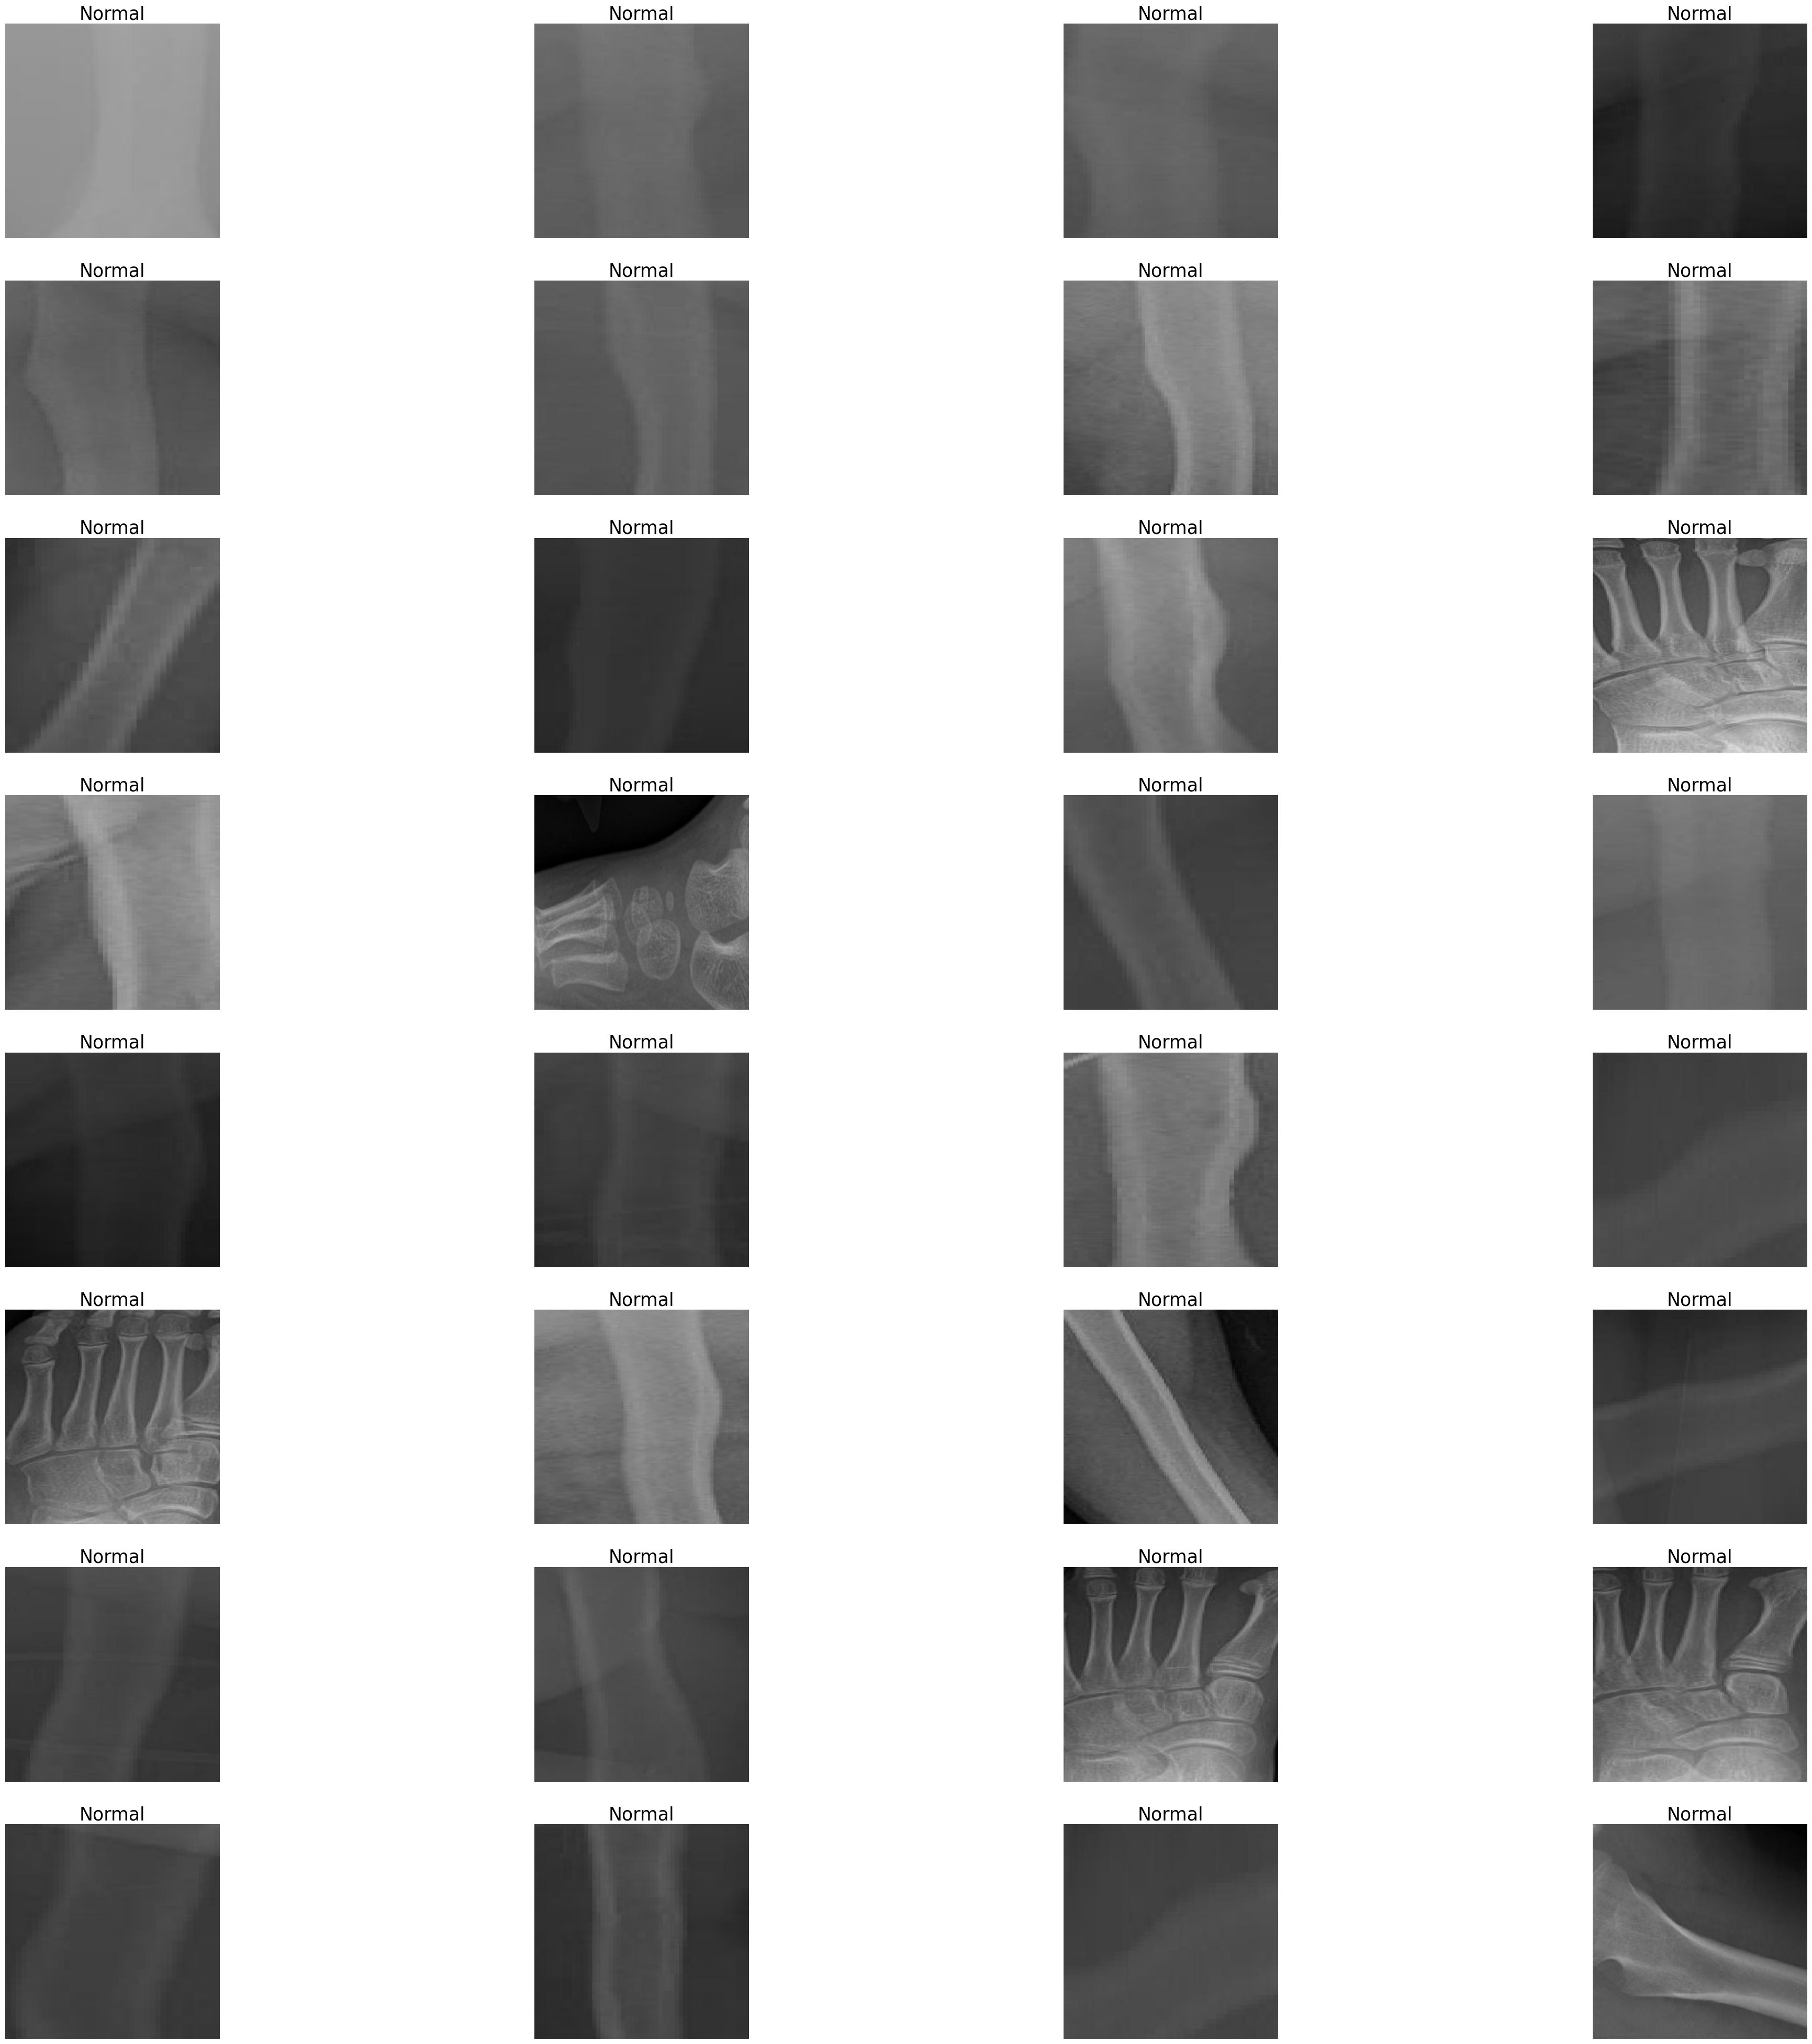

In [ ]:
class_names=['Cancer', 'Normal']
batch = next(test_generator)
images= batch[0]
plt.figure(figsize=(50,50))
for n in range(32):
    plt.subplot(8,4,n+1)
    plt.imshow(images[n])
    plt.axis('off')
    plt.title(class_names[int(y_test[n])],fontsize=25)

In [ ]:
# Import the necessary library and function
from sklearn.metrics import classification_report


In [ ]:
# Classification Report
ClassificationReport = classification_report(y_test, y_pred, target_names=['Cancer','Normal'])
print('Classification Report:\n', ClassificationReport)

Classification Report:
               precision    recall  f1-score   support

      Cancer       0.76      0.94      0.84      1264
      Normal       0.93      0.73      0.82      1379

    accuracy                           0.83      2643
   macro avg       0.85      0.84      0.83      2643
weighted avg       0.85      0.83      0.83      2643



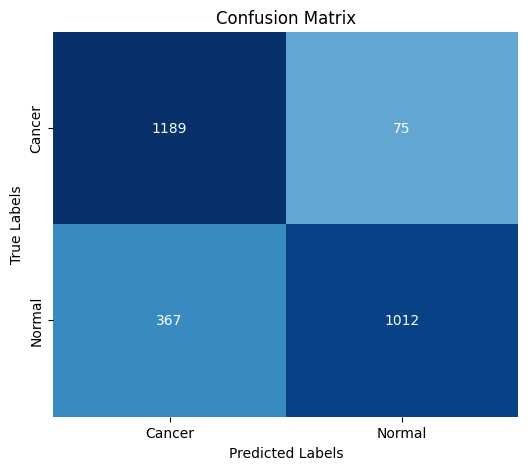

Confusion Matrix:
 [[1189   75]
 [ 367 1012]]


In [ ]:
from sklearn.metrics import confusion_matrix # import the confusion_matrix function
CM = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(CM, fmt='g', center=True, cbar=False, annot=True, cmap='Blues',
            xticklabels=['Cancer', 'Normal'],
            yticklabels=['Cancer', 'Normal'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print('Confusion Matrix:\n', CM)

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [ ]:
y_test_binarized = label_binarize(y_test, classes=[0, 1])
y_pred_prob = predictions.ravel()
fpr, tpr, _ = roc_curve(y_test_binarized, y_pred_prob)
roc_auc = auc(fpr, tpr)

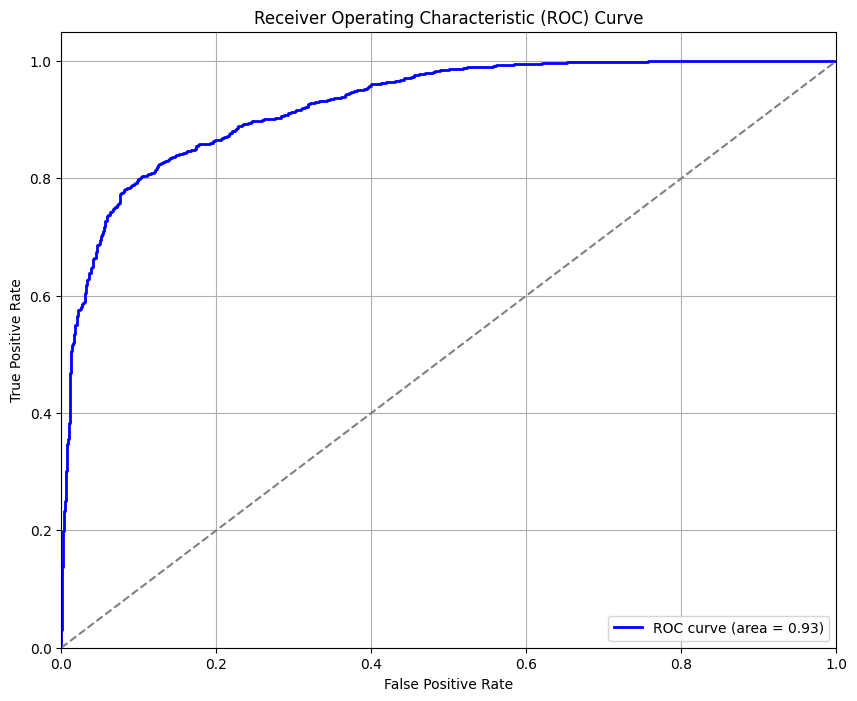

ROC AUC Score: 0.93


In [ ]:
# Import the necessary library and function
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize labels (if not already)
y_test_binarized = label_binarize(y_test, classes=[0, 1])
y_pred_prob = predictions.ravel()

#Calculate fpr, tpr, and roc_auc
fpr, tpr, _ = roc_curve(y_test_binarized, y_pred_prob)
roc_auc = auc(fpr, tpr)

#Plot the ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
print(f'ROC AUC Score: {roc_auc:.2f}')

## USER INPUT

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ipywidgets as widgets
from IPython.display import display

def predict_and_display(change):
    """Predicts and displays an image based on user input."""

    user_input = change.new.lower().strip()  # Access new value directly

    if user_input not in ["cancer", "normal"]:
        print("Invalid input. Please enter 'cancer' or 'normal'.")
        return

    filtered_df = test_df[test_df['label'] == user_input]

    if filtered_df.empty:
        print(f"No images found for class '{user_input}' in the test dataset.")
        return

    random_image_row = filtered_df.sample(n=1)
    image_path = os.path.join(test_dataset, random_image_row['image'].values[0])

    img = mpimg.imread(image_path)
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.title(f"Predicted Class: {random_image_row['label'].values[0]}")
    plt.axis("off")
    plt.show()

# Widget setup
input_widget = widgets.Text(
    value='',
    placeholder='Enter "cancer" or "normal"',
    description='Class:',
    disabled=False
)

display(input_widget)
input_widget.observe(predict_and_display, names='value') # Observe 'value' changes



Text(value='', description='Class:', placeholder='Enter "cancer" or "normal"')